## Estadistica Aplicada
Sesion 10 - 14 Septiembre

Alexandra Guadalupe Valdez Mireles 1910361

Gpo: 44

In [4]:
## Librerias Base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Librerias Especiales
from lifelines import CoxPHFitter, KaplanMeierFitter, ExponentialFitter, WeibullFitter, LogNormalFitter
import seaborn as sns

In [5]:
## Importat Datos
df_cancer = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/cancer.csv')

In [6]:
df_cancer.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


Los datos constan de 228 observaciones y 10 variables/columnas. La descripción de las variables es la siguiente:
inst: código de institución\
**time (d1)**: tiempo de supervivencia en días\
**status (d2)**: estado de censura 1 = censurado, 2 = muerto\
**age (i1)**: Edad en años\
**sex (i2)**: Masculino = 1 Femenino = 2\
**ph.ecog (i3)**: puntuación de rendimiento ECOG según la calificación del médico. 0 = asintomático, 1 = sintomático pero completamente ambulatorio, 2 = en cama <50% del día, 3 = en cama > 50% del día pero no encamado, 4 = encamado\
**ph.karno (i4)**: puntuación de desempeño de Karnofsky (mala = 0; buena = 100) calificada por el médico\
**pat.karno (i4)**: puntuación de rendimiento de Karnofsky según la calificación del paciente\
**meal.cal (i5)**: Calorías consumidas en las comidas\
**wt.loss (i6)**: Pérdida de peso en los últimos seis meses.

In [7]:
## 3 paso- Estadisticas descriptivas - - - ajuste datos
df_cancer['status'] = df_cancer['status']-1
df_cancer['sex'] = df_cancer['sex']-1
## status 0=censurado, 1=muerto
## sex 0=Hombre, 1=Mujer

In [8]:
# Eliminar Variable "inst"
df_cancer = df_cancer.drop('inst', axis = 1)

In [9]:
## Todas deben ser Numericas - - - Verificar que sean Numericas
df_cancer.dtypes

time           int64
status         int64
age            int64
sex            int64
ph.ecog      float64
ph.karno     float64
pat.karno    float64
meal.cal     float64
wt.loss      float64
dtype: object

In [10]:
## Verificar cuantos missing values (Valores Perdidos)
df_cancer.isnull().sum()

time          0
status        0
age           0
sex           0
ph.ecog       1
ph.karno      1
pat.karno     3
meal.cal     47
wt.loss      14
dtype: int64

In [11]:
## Elimiar datos / imputar datos
# imputar asignar lso valores perdidos
df_cancer['ph.karno'] = df_cancer['ph.karno'].fillna(df_cancer['ph.karno'].mean())
df_cancer['pat.karno'] = df_cancer['pat.karno'].fillna(df_cancer['pat.karno'].mean())
df_cancer['meal.cal'] = df_cancer['meal.cal'].fillna(df_cancer['meal.cal'].mean())
media_loss = df_cancer['wt.loss'].mean()
df_cancer['wt.loss'] = df_cancer['wt.loss'].fillna(media_loss)

In [12]:
# contar otra vez los missing values
df_cancer.count()

time         228
status       228
age          228
sex          228
ph.ecog      227
ph.karno     228
pat.karno    228
meal.cal     228
wt.loss      228
dtype: int64

In [13]:
# Eliminar los que tienen valores perdidos
df_cancer = df_cancer.dropna()

In [14]:
# En el caso de lifelines cuando arroja la regresion las categoricas las toma como continuas,
# entonces hay que convertir en dummies las variables categoricas.
# Convertir ph.ecog en entero 
df_cancer['ph.ecog']=df_cancer['ph.ecog'].astype('int64')

In [15]:
# Convertir en dummies por pandas
dummies=pd.get_dummies(df_cancer['ph.ecog'], prefix='ecog').astype(int)
dummies.head()

,ecog_0,ecog_1,ecog_2,ecog_3
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0


In [16]:
dummies.describe()

,ecog_0,ecog_1,ecog_2,ecog_3
count,227.000000,227.000000,227.000000,227.000000
mean,0.277533,0.497797,0.220264,0.004405
std,0.448771,0.501100,0.415341,0.066372
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [17]:
#se guardan los dummies en el data frame y s eliminan los datos reles de ph.ecog
dummies = dummies[['ecog_1','ecog_2']]
df_cancer = pd.concat([df_cancer,dummies],axis=1)
df_cancer = df_cancer.drop('ph.ecog',axis=1)

In [18]:
df_cancer.head()

,time,status,age,sex,ph.karno,pat.karno,meal.cal,wt.loss,ecog_1,ecog_2
0,306,1,74,0,90.0,100.0,1175.000000,9.831776,1,0
1,455,1,68,0,90.0,90.0,1225.000000,15.000000,0,0
2,1010,0,56,0,90.0,90.0,928.779006,15.000000,0,0
3,210,1,57,0,90.0,60.0,1150.000000,11.000000,1,0
4,883,1,60,0,100.0,90.0,928.779006,0.000000,0,0


In [19]:
## Estadsiticas Descriptivas
df_cancer.describe()

,time,status,age,sex,ph.karno,pat.karno,meal.cal,wt.loss,ecog_1,ecog_2
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,306.264317,0.722467,62.458150,0.396476,82.034971,79.999413,927.474067,9.734118,0.497797,0.220264
std,210.532764,0.448771,9.092045,0.490246,12.240894,14.543193,358.375611,12.670492,0.501100,0.415341
min,5.000000,0.000000,39.000000,0.000000,50.000000,30.000000,96.000000,-24.000000,0.000000,0.000000
25%,168.500000,0.000000,56.000000,0.000000,80.000000,70.000000,768.000000,0.000000,0.000000,0.000000
50%,259.000000,1.000000,63.000000,0.000000,80.000000,80.000000,928.779006,8.000000,0.000000,0.000000
75%,399.000000,1.000000,69.000000,1.000000,90.000000,90.000000,1075.000000,15.000000,1.000000,0.000000
max,1022.000000,1.000000,82.000000,1.000000,100.000000,100.000000,2600.000000,68.000000,1.000000,1.000000


In [20]:
df_cancer['status'].value_counts()

status
1    164
0     63
Name: count, dtype: int64

El 72% de los individuos fallecieron,el 39% es mujer, la edad promedio es de 62.44, el individuo mas joven tiene 39 y el de mas edad tiene 82.

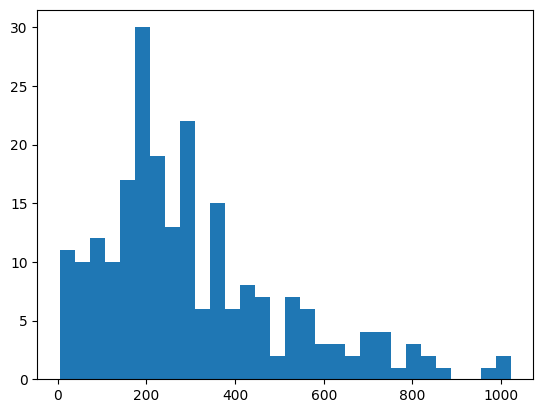

In [21]:
## Distribucion de T
plt.hist(df_cancer['time'], bins = 30)
plt.show;

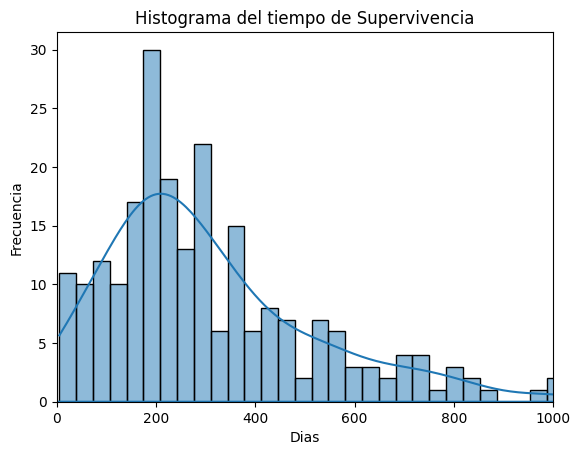

In [22]:
sns.histplot(df_cancer['time'], bins=30, kde=True)
## Añadir curva de distribucion
sns.kdeplot(df_cancer['time'])
plt.xlim(0,1000)
plt.title('Histograma del tiempo de Supervivencia')
plt.ylabel('Frecuencia')
plt.xlabel('Dias');

Notar que alistar la base de datos siempre es la parte mas complicada del analisis de datos

In [23]:
## Estimacion del modelo
cph1 = CoxPHFitter().fit(df_cancer, 'time', 'status')
cph1.print_summary()

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.CoxPHFitter: fitted with 227 total observations, 63 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 227
number of events observed = 164
   partial log-likelihood = -726.94
         time fit was run = 2023-09-20 03:24:17 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
sex        -0.58       0.56       0.17            -0.92            -0.25                 0.40                 0.78
ph.karno    0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
pat.karno  -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.01       0.99       0.01            -0.02             0.00                 0.98                 1.00
ecog_1      0.56       1.74       0.24             0.09             1.02                 1.10                 2.77
ecog_2      1.08       2.94       0.37             0.35             1.80                 1.43                 6.08

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00  1.37   0.17       2.54
sex           0.00 -3.41 <0.005      10.59
ph.karno      0.00  1.37   0.17       2.56
pat.karno     0.00 -1.82   0.07       3.87
meal.cal      0.00  0.11   0.92       0.13
wt.loss       0.00 -1.65   0.10       3.35
ecog_1        0.00  2.35   0.02       5.74
ecog_2        0.00  2.92 <0.005       8.15
---
Concordance = 0.65
Partial AIC = 1469.88
log-likelihood ratio test = 35.08 on 8 df
-log2(p) of ll-ratio test = 15.24

"Si el exp(coef)>1 entonces exp(coef)-1"  "Si el exp(coef)<1 entonces 1-exp(coef)" \
El signo del coeficiente nos dice si disminuye o aumenta el riesgo.\
El exponente del coeficiente nos calcula la probabilidad del evento\
Si el exp del coef es mayor a 1 entonces exp(coef)-1\
Si el exp del coef es menor a 1 entonces 1-exp(coef)

**Age**: Su P-Value=0.17 es menor a alfa(0.05), NO Rechazamos H0, significa que Age no tiene efecto sobre morir de cancer. \
**Sex**: Rechazamos H0, Ser Mujer disminuye el riesgo de morir de cancer en 44% en comparacion con los hombres. \
**Ph.karno, Pat.Karno, Meal.Cal, Wt.loss**: NO Rehazamos H0, las variables no tienen efecto sobre el riesgo de morir de cancer. \
**ecog_1:ambulatorio**: Rechazamos H0, significa que los ambulatorios tienen mayor riesgo de morir de cancer, tienen un 74% de riesgo de morir de cancer que un asintomatico de cancer. \
**ecog_2:cama<50%** Rechazamos H0, Estadisticamente significa que los que estan en cama tienen mayor riesgo de morir de cancer, 194% en riesgo a morir en comparacion con un asintomatico.

In [24]:
df_cancer.columns

Index(['time', 'status', 'age', 'sex', 'ph.karno', 'pat.karno', 'meal.cal',
       'wt.loss', 'ecog_1', 'ecog_2'],
      dtype='object')

In [25]:
## Importar una nueva Base de Datos
from lifelines.datasets import load_rossi

rossi = load_rossi()
rossi.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [26]:
## Verificar que sean numericas
rossi.dtypes

week      int64
arrest    int64
fin       int64
age       int64
race      int64
wexp      int64
mar       int64
paro      int64
prio      int64
dtype: object

In [27]:
## Verificar que no haya valores perdidos
rossi.isnull().sum()

week      0
arrest    0
fin       0
age       0
race      0
wexp      0
mar       0
paro      0
prio      0
dtype: int64

In [28]:
## Estadisticas Descriptivas
rossi.describe()

,week,arrest,fin,age,race,wexp,mar,paro,prio
count,432.000000,432.000000,432.00000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,45.854167,0.263889,0.50000,24.597222,0.877315,0.571759,0.122685,0.618056,2.983796
std,12.662293,0.441251,0.50058,6.113375,0.328456,0.495398,0.328456,0.486426,2.896068
min,1.000000,0.000000,0.00000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,0.00000,20.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,52.000000,0.000000,0.50000,23.000000,1.000000,1.000000,0.000000,1.000000,2.000000
75%,52.000000,1.000000,1.00000,27.000000,1.000000,1.000000,0.000000,1.000000,4.000000
max,52.000000,1.000000,1.00000,44.000000,1.000000,1.000000,1.000000,1.000000,18.000000


Esta base es de USA en los 80's? \
arrest 1 = Si volvio a ser arrrestado, 0 = Censurado\
week = Semanas que tardo en volver a ser arrestado 

In [29]:
## Vamos a estimar un modelo de Cox
cph2 = CoxPHFitter().fit(rossi, 'week','arrest')
cph2.print_summary()

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2023-09-20 03:27:18 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

            cmp to     z      p   -log2(p)
covariate                                 
fin           0.00 -1.98   0.05       4.40
age           0.00 -2.61   0.01       6.79
race          0.00  1.02   0.31       1.70
wexp          0.00 -0.71   0.48       1.06
mar           0.00 -1.14   0.26       1.97
paro          0.00 -0.43   0.66       0.59
prio          0.00  3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

**fin** No Rechazamos H0, significa que darles dinero cuando los liberan no tiene efecto sobre el riesgo de volver a ser arrestado.\
**age** Rechazamos H0, la Edad disminuye el riesgo de volver a ser arrestado, por cada año que se cumple el riesgo de volver a ser arrestado disminuye en 6%\
**race** No Rechazamos H0, significa que ser negro no afecta el riesgo de volver a ser arrestado en comparacion de los que no son negros.\
**wexp, mar, paro** No rechazamos H0, Estar casado, y desempleado cuando te arrestaron no tienen efecto sobre el riesgo de volver a ser arrestado\
**prio** Rechazamps H0, Significa que el haber estado varias veces antes en la carcel si tiene un incremento en el riesgo de volver a ser arrestado, por cada vez que estuvo en la carcel aumenta el riesgo de volver a ser arrestado un 10%

El modelo de COX se basa en el supuesto de que el riesgo es constante en el tiempo (riesgo proporcional constante)

In [30]:
cph2.check_assumptions(rossi, p_value_threshold=0.05)
# H0 viola supuesto
# Ha no viola el supuesto

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
         test_name = proportional_hazard_test

---
           test_statistic      p  -log2(p)
age  km             11.03 <0.005     10.12
     rank           11.45 <0.005     10.45
fin  km              0.02   0.89      0.17
     rank            0.02   0.90      0.15
mar  km              0.60   0.44      1.19
     rank            0.71   0.40      1.32
paro km              0.12   0.73      0.45
     rank            0.13   0.71      0.49
prio km              0.02   0.88      0.18
     rank            0.02   0.89      0.17
race km              1.44   0.23      2.12
     rank            1.43   0.23      2.11
wexp km              7.48   0.01      7.32
     rank            7.31   0.01      7.19



1. Variable 'age' failed the non-proportional test: p-value is 0.0007.

   Advice 1: the functional form of the variable 'age' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'age' using pd.cut, and then specify it in `strata=['age',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'wexp' failed the non-proportional test: p-value is 0.0063.

   Advice: with so few unique values (only 2), you can include `strata=['wexp', ...]` in the call in
`.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/lat

[]

La hipotesis nula en este caso

$H0:$ es que se viola el supuesto\
$Ha:$ no se viola el supuesto

In [34]:
## Alternativas para la violacion de supuestos: 
# 1. Eliminar las variables o recodificarlas. Edad podemos hacerla dummies 
## 2. Estimar otro modelo AFT (modelo de riesgo acelerado)

##age y wexp violan el supuesto porque no se rechaza H0 (lo podemos checar en p value y -log2)
##en este caso eliminar wexp no tiene efecto pero age no se puede eliminar 
##para cuando se quiten del modelo las demas siguen el supuesto 

In [35]:
## Verificar los supuestos
cph1 = CoxPHFitter().fit(df_cancer, 'time', 'status')
cph1.check_assumptions(df_cancer, p_value_threshold=0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 227 total observations, 63 right-censored observations>
         test_name = proportional_hazard_test

---
                test_statistic    p  -log2(p)
age       km              0.35 0.55      0.86
          rank            0.14 0.71      0.50
ecog_1    km              2.31 0.13      2.96
          rank            2.14 0.14      2.80
ecog_2    km              1.88 0.17      2.55
          rank            1.47 0.23      2.15
meal.cal  km              5.13 0.02      5.41
          rank            4.53 0.03      4.91
pat.karno km              0.26 0.61      0.71
          rank            0.21 0.65      0.62
ph.karno  km              4.76 0.03      5.10
          rank            4.13 0.04      4.57
sex       km              2.71 0.10      3.33
          rank            2.58 0.11      3.21
wt.loss   km              0.01 0.93      0.11
          rank            0.04 0.85      0.24



1. Variable 'ph.karno' failed the non-proportional test: p-value is 0.0292.

   Advice 1: the functional form of the variable 'ph.karno' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'ph.karno' using pd.cut, and then specify it in
`strata=['ph.karno', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'meal.cal' failed the non-proportional test: p-value is 0.0235.

   Advice 1: the functional form of the variable 'meal.cal' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional

[]

ph.karno y meal.cal violan el supuesto de riesgo proporcional constante 

In [36]:
## Vamos a elegir El modelo AFT
## Primero tenemos que determinar si es exponencial, weibull o lognormal

In [37]:
from lifelines import ExponentialFitter, WeibullFitter, LogNormalFitter

In [38]:
mexpo = ExponentialFitter().fit(rossi['week'], rossi['arrest'])
mweibull = WeibullFitter().fit(rossi['week'], rossi['arrest'])
mlogn = LogNormalFitter().fit(rossi['week'], rossi['arrest'])

In [39]:
mexpo.AIC_.round(2), mweibull.AIC_.round(2), mlogn.AIC_.round(2)

(1405.95, 1397.25, 1399.82)

In [40]:
##se elige el modelo con el menor valor
##vamos a estimar un AFT weibull 

## Vamos a Estimar un AFT Weibull

In [41]:
from lifelines import WeibullAFTFitter

In [42]:
weibullAFT1 = WeibullAFTFitter().fit(rossi, 'week', 'arrest')
weibullAFT1.print_summary()

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.WeibullAFTFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
   number of observations = 432
number of events observed = 114
           log-likelihood = -679.92
         time fit was run = 2023-09-20 03:31:38 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                         
lambda_ age         0.04       1.04       0.02             0.01             0.07                 1.01                 1.07
        fin         0.27       1.31       0.14             0.00             0.54                 1.00                 1.72
        mar         0.31       1.37       0.27            -0.22             0.85                 0.80                 2.33
        paro        0.06       1.06       0.14            -0.21             0.33                 0.81                 1.39
        prio       -0.07       0.94       0.02            -0.11            -0.02                 0.90                 0.98
        race       -0.22       0.80       0.22            -0.66             0.21                 0.52                 1.23
        wexp        0.11       1.11       0.15            -0.19             0.40                 0.83                 1.50
        Intercept   3.99      54.06       0.42             3.17             4.81                23.78               122.92
rho_    Intercept   0.34       1.40       0.09             0.16             0.51                 1.18                 1.67

                    cmp to     z      p   -log2(p)
param   covariate                                 
lambda_ age           0.00  2.54   0.01       6.51
        fin           0.00  1.97   0.05       4.37
        mar           0.00  1.14   0.25       1.97
        paro          0.00  0.42   0.67       0.57
        prio          0.00 -3.14 <0.005       9.22
        race          0.00 -1.02   0.31       1.70
        wexp          0.00  0.70   0.48       1.05
        Intercept     0.00  9.52 <0.005      68.98
rho_    Intercept     0.00  3.81 <0.005      12.81
---
Concordance = 0.64
AIC = 1377.83
log-likelihood ratio test = 33.42 on 7 df
-log2(p) of ll-ratio test = 15.46

In [43]:
## AFT el efecto es  sobre la media del tiempo de supervivencia

**age** Rechazamos H0, La edad incrementa (media) el tiempo en el que tardas en volver a ser arrestado, por cada año de edad la media del tiempo en volver a ser arrestado se incrementa en 4%\
**fin, mar, wexp, paro, race** no se rechazan en H0, no tienen efecto sobre la media del tiempo de volver a ser arrestado\
**prio** Rechazamos H0, el ser arrestado antes disminuye la media del tiempo de volver a ser arrestado, por cada vez que ha sido arrestado disminuye la media del tiempo en 6%